<a href="https://colab.research.google.com/github/esramostafa20/Regression-Models-/blob/main/05_lasso__Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Lasso Regression (L1 Regularization)
Lasso = Least Absolute Shrinkage and Selection Operator



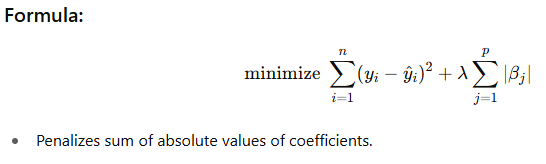

## When to use:
1. When you want feature selection (some coefficients become exactly zero).

2. When you want a sparse model| Sparse models (removes unimportant features)

## When not to use:
1. When you want to keep all variables.

2. When features are highly correlated (Lasso tends to pick only one).

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LassoCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/final_student_data.csv")  # Or use any built-in dataset
df.head()

,math score,reading score,writing score,total,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,247,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,278,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,148,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,229,True,False,True,False,False,False,False,False,True,False,True,True


In [ ]:
X = df.drop(columns=['math score', 'reading score', 'writing score', 'total'])  # or keep only relevant
y = df['total']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# LassoCV: automatically finds the best alpha using cross-validation
lasso = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5, max_iter=10000)


lasso.fit(X_train, y_train)

LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5, max_iter=10000)

In [ ]:
# Predict and clip to range
y_pred = lasso.predict(X_test)

NameError: name 'np' is not defined

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results:")
print("Best alpha:", lasso.alpha_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Lasso Regression Results:
Best alpha: 0.1
Mean Squared Error: 1629.905455015561
R2 Score: 0.15518259713304117


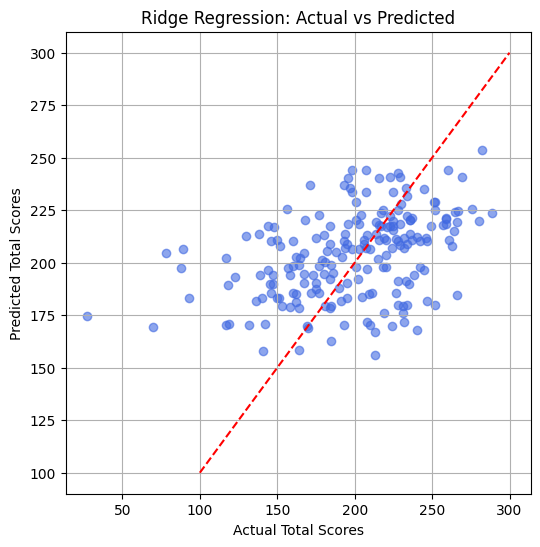

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([100, 300], [100, 300], 'r--')   # Diagonal line: perfect prediction
plt.xlabel("Actual Total Scores")
plt.ylabel("Predicted Total Scores")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

## 🧠 Interpretation:
1. Performance is:

Very close to Ridge Regression (MSE: 1617.68, R²: 0.16)

So Lasso didn’t outperform Ridge, but it’s in the same range

2. Best alpha = 0.1:

A small value, meaning light regularization works better here.

3. R² = 0.15:

Still means the model only explains 15% of the variance in the total score — not good enough for a strong regression model.

# ✅ What to Do Now
Since you’ve:

✅ Tried Linear Regression

✅ Tried Ridge

✅ Tried Lasso

All with poor R²...

👉 It's time to switch to a non-linear model like:

| Model                         | Why                                                              |
| ----------------------------- | ---------------------------------------------------------------- |
| **RandomForestRegressor**     | Handles non-linearity, feature interactions, and noise very well |
| **GradientBoostingRegressor** | Often even better, but more sensitive to tuning                  |
